<a href="https://colab.research.google.com/github/dr-bankert-augustana/PHYS_377/blob/main/Homework_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

<font size = 6> <b> Import Python Libraries </b> </font>

---

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display_html

---

<font size = 6> <b> Define Useful Functions </b> </font>

---

In [7]:
#@title This cell defines useful functions

##=============================================================================================##
## Included Functions:                                                                         ##
##                                                                                             ##
## 1. display_dataframes - Display multiple DataFrames side-by-side with titles                ##
## 2. load_model         - Load and clean data from input file, split into feature and target  ##
## 3. display_models      - Display models' parameters and loss in a DataFrame                 ##
## 4. plot_data          - Create a graph with raw data, can add model to graph if needed      ##
##=============================================================================================##

##=============================================================================================##
## Function:  display_dataframes                                                               ##
##                                                                                             ##
## Purpose:   Display multiple DataFrames side-by-side with titles                             ##
##                                                                                             ##
## Input(s):  dataframe_list - List of DataFrames to be displayed                              ##
##            title_list     - List of titles for the displayed DataFrames                     ##
##            n_items        - Number of items to display (optional, default = 5)              ##
##                                                                                             ##
## Output(s): None                                                                             ##
##=============================================================================================##

def display_dataframes(dataframe_list, title_list, n_items = 5):

  ##===========================================================================================##
  ## Create a String for Housing the Commands to Be Sent to the display_html() Function:       ##
  ##===========================================================================================##

  html_str = ""

  ##===========================================================================================##
  ## Loop Over the Elements in the item_list and title_list:                                   ##
  ##===========================================================================================##

  for df, title in zip(dataframe_list, title_list):

    # Convert the current dataframe info to html:

    html_df = pd.DataFrame(df).head(n_items).to_html()

    ##=========================================================================================##
    ## Wrap title and DataFrames in a Styled HTML <div>:                                       ##
    ##=========================================================================================##

    html_str += "<div style='display: inline-block; margin-right: 20px; vertical-align: top;'>"

    html_str += "<h3 style='text-align: center;'>" + str(title) + "</h3><hr>" + str(html_df)

    html_str += "</div>"

  ##===========================================================================================##
  ## Send the HTML String to the display_html() Function:                                      ##
  ##===========================================================================================##

  display_html(html_str, raw = True)

---

<font size = 6> <b> Problem 1 </b> </font>

---

# Numerical Verification of the Mean-Value Property

---

## Setup:

Consider the electrostatic potential

$$
V(x,y,z) = x^2 - y^2 + 2z
$$

which satisfies Laplace’s equation

$$
\nabla^2 V = 0
$$

---


### Goal:

Confirm numerically that

$$
V_{\text{ave}}(R) \approx V(0,0,0)
$$

for all values of R, illustrating the **mean-value property of Laplace’s equation**.

---


### Your Task:

Complete the following Python program so that it:

**a.** Computes the average of (V) over these points, ($V_{\text{ave}}(R)$).

**b.** Compares your answer in (a) with the value of (V) at the origin.

**c.** Investigate how point coverage affects the approximation.



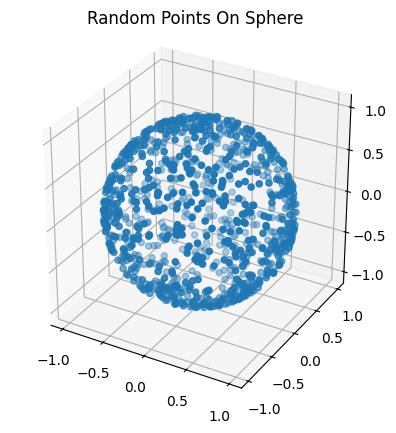

,theta,phi,x,y,z
0,0.732979,3.504112,-0.625600,-0.237279,0.743185
1,2.079389,1.701041,-0.113439,0.866033,-0.486948
2,1.175282,2.143327,-0.499936,0.775642,0.385283
3,0.641796,1.929356,-0.210077,0.560564,0.801022
4,0.985788,1.492094,0.065547,0.831127,0.552207


In [8]:
##=============================================================================================##
## Generate the Observation Locations:                                                         ##
##=============================================================================================##

def random_points_on_sphere(R, N, plot = False):

    # Uniform Distribution in Azimuthal Angle:

    phi = np.random.uniform(0, 2 * np.pi, N)

    # Uniform Distribution in Polar Angle:

    u = np.random.uniform(-1, 1, N)

    theta = np.arccos(u)

    # Convert to Cartesian Coordinates:

    x = R * np.sin(theta) * np.cos(phi)
    y = R * np.sin(theta) * np.sin(phi)
    z = R * np.cos(theta)

    # Create DataFrame of Points:

    points_df = pd.DataFrame(
        {
          "theta": theta,
          "phi": phi,
          "x": x,
          "y": y,
          "z": z
    })

    # If Requested, Show a Plot of the Points:

    if plot:

      fig = plt.figure()
      ax = fig.add_subplot(111, projection = '3d')
      ax.set_title("Random Points On Sphere")
      ax.set_box_aspect((1,1,1))
      ax.scatter(x, y, z)
      plt.show()

      # Return Coordinates of Random Points:

    return points_df

##=============================================================================================##
## Example Set of Points:                                                                      ##
##=============================================================================================##

points_df = random_points_on_sphere(1.0, 1000, plot = True)

display_dataframes([points_df], ["Random Points On Sphere"])

In [9]:
##=============================================================================================##
## Compute the Electric Potential:                                                             ##
##=============================================================================================##

def V(points_df):

  x = points_df["x"]
  y = points_df["y"]
  z = points_df["z"]

  ## YOUR CODE HERE

  points_df["V"] = x**2 - y**2 + 2*z

  return points_df

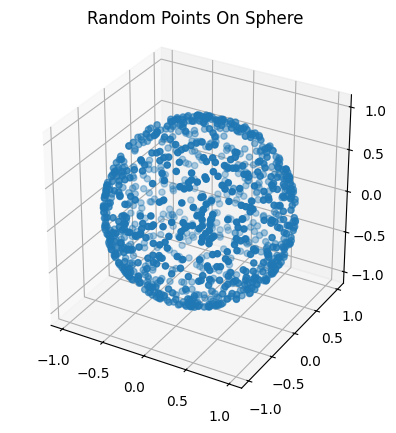

,theta,phi,x,y,z
0,1.222798,5.229593,0.464813,-0.817102,0.341017
1,0.553581,5.537240,0.386126,-0.356800,0.850647
2,1.411053,4.355550,-0.344867,-0.925076,0.159065
3,1.659084,1.577498,-0.006676,0.996083,-0.088173
4,2.126994,2.605967,-0.730328,0.433449,-0.527961


,theta,phi,x,y,z,V
0,1.222798,5.229593,0.464813,-0.817102,0.341017,0.230428
1,0.553581,5.537240,0.386126,-0.356800,0.850647,1.723081
2,1.411053,4.355550,-0.344867,-0.925076,0.159065,-0.418703
3,1.659084,1.577498,-0.006676,0.996083,-0.088173,-1.168483
4,2.126994,2.605967,-0.730328,0.433449,-0.527961,-0.710421



Average Electric Potential:  -0.07745 V

Error:  0.07745 V


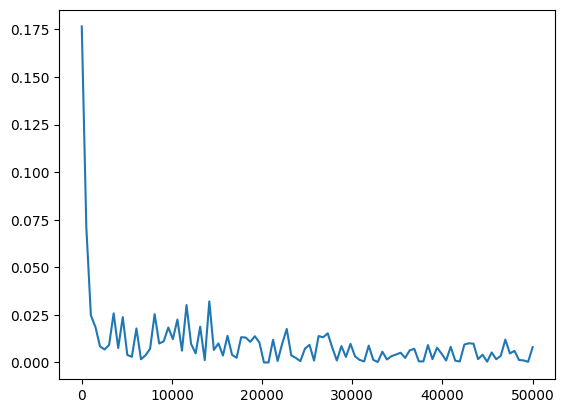

In [19]:
##=============================================================================================##
## Step 1: Generate Points                                                                     ##
##=============================================================================================##

## YOUR CODE HERE

points_df = random_points_on_sphere(1.0, 1000, plot = True)

display_dataframes([points_df], ["Random Points On Sphere"])

##=============================================================================================##
## Step 2: Compute the Electric Potential                                                      ##
##=============================================================================================##

## YOUR CODE HERE

electric_potential_df = V(points_df)

display_dataframes([electric_potential_df], ["Electric Potential"])

##=============================================================================================##
## Step 3: Find the Average Electric Potential                                                 ##
##=============================================================================================##

## YOUR CODE HERE

average_potential = np.mean(electric_potential_df["V"])

print()
print("Average Electric Potential: ", np.round(average_potential, 5), "V")

##=============================================================================================##
## Step 4: Find the Electric Potential at the Origin:                                          ##
##=============================================================================================##

## YOUR CODE HERE

origin_potential = 0.0

##=============================================================================================##
## Step 5: Find the Absolute Error                                                             ##
##=============================================================================================##

## YOUR CODE HERE

absolute_error = np.abs(average_potential - origin_potential)

print()
print("Error: ", np.round(absolute_error, 5), "V")

##=============================================================================================##
## Step 6: Graph the Error vs Number of Points on Sphere (10 points -> 50_000 points)          ##
##=============================================================================================##

error_list = []
N_list = np.linspace(10, 5e4, 100)

## YOUR CODE HERE

for N in N_list:

  points_df = random_points_on_sphere(1.0, int(N))

  electric_potential_df = V(points_df)

  average_potential = np.mean(electric_potential_df["V"])

  origin_potential = 0.0

  absolute_error = np.abs(average_potential - origin_potential)

  error_list.append(absolute_error)

figure = plt.figure()
ax     = figure.add_subplot(111)

ax.plot(N_list, error_list)


---

<font size = 6> <b> Problem 2 </b> </font>

---

# Numerical Method of Images

---

## Setup:

Two infinite parallel grounded conducting planes are held a distance (a) apart. A point charge (q) is placed in the region between them, a distance (x) from
the right plate.

---


### Goal:

Find the force on (q) due to a series of N images charges.

---


### Your Task:

Complete the following Python program so that it:

**a.** Computes the correct position and charge of the series of image charges.

**b.** Computes the total force on the real charge.

**c.** Compare your answer to the special cases when (a) the separation distance between the plates goes to infinity (i.e. a single conducting plane remains as the other is infinitely far away) and (b) the real charge is placed exactly halfway between the two conducting planes.

In [20]:
##=============================================================================================##
## Define Constants:                                                                           ##
##=============================================================================================##

k = 9e9 # N m^2/C^2

##=============================================================================================##
## Step 1: Create a Function to Generate the Image Charges                                     ##
##=============================================================================================##

def single_plane_image(q, charge_position, plane_position):

  ## YOUR CODE HERE

  d = charge_position - plane_position
  x_image = plane_position - d
  q_image = -q

  return q_image, x_image

In [21]:
##=============================================================================================##
## Step 2: Test the Function to Make Sure it Works                                             ##
##=============================================================================================##

q_image, x_image = single_plane_image(1e-9, 0.0, 1.0)

print("q_image = ", np.round(q_image, 12), " x_image = ", np.round(x_image, 3))

q_image =  -1e-09  x_image =  2.0


In [22]:
##=============================================================================================##
## Step 3: Create a Function to Generate the first (N) Image Charges                           ##
##=============================================================================================##

def get_image_charges(q_real, x_real, x_plate_r, x_plate_l, N):

  # Create Lists to Store the Image Charge Information:

  q_images_l_list = []
  x_images_l_list = []
  q_images_r_list = []
  x_images_r_list = []

  # Create the First Image Charges:

  ## YOUR CODE HERE

  q_image_l, x_image_l = single_plane_image(q_real, x_real, x_plate_l)
  q_image_r, x_image_r = single_plane_image(q_real, x_real, x_plate_r)

  # Store the Image Charges' Information:

  ## YOUR CODE HERE

  q_images_l_list.append(q_image_l)
  x_images_l_list.append(x_image_l)
  q_images_r_list.append(q_image_r)
  x_images_r_list.append(x_image_r)

  # Calculate the Remaining N-1 Image Charge Pairs:

  ## YOUR CODE HERE

  for i in range(1, N):

    q_image_l, x_image_l = single_plane_image(q_images_r_list[-1], x_images_r_list[-1], x_plate_l)
    q_image_r, x_image_r = single_plane_image(q_images_l_list[-1], x_images_l_list[-1], x_plate_r)

    q_images_l_list.append(q_image_l)
    x_images_l_list.append(x_image_l)
    q_images_r_list.append(q_image_r)
    x_images_r_list.append(x_image_r)

  # Create a DataFrame to Store the Image Charge Information:

  points_df = pd.DataFrame(
    {
      "Charges":   q_images_l_list + q_images_r_list,
      "Positions": x_images_l_list + x_images_r_list
    })

  # Return the DataFrame:

  return points_df.sort_values("Positions")

In [25]:
##=============================================================================================##
## Step 4: Create a Function to Compute the Force on the Real Charge                           ##
##=============================================================================================##

def image_force(q_real, x_real, images_df):

  ## YOUR CODE HERE

  q_images = images_df["Charges"]
  x_images = images_df["Positions"]

  F = 0.0

  for (qi, xi) in zip(q_images, x_images):

    r = x_real - xi

    F += k * q_real * qi * np.sign(r) / r**2

  return F

,Charges,Positions
99,1.000000e-09,-99.95
98,-1.000000e-09,-99.05
97,1.000000e-09,-97.95
96,-1.000000e-09,-97.05
95,1.000000e-09,-95.95



F_total = 3.859810e-09 N (+x)

F_single_plate = 1.111111e-08 N (+x)

Percent Error = 65.261709 %


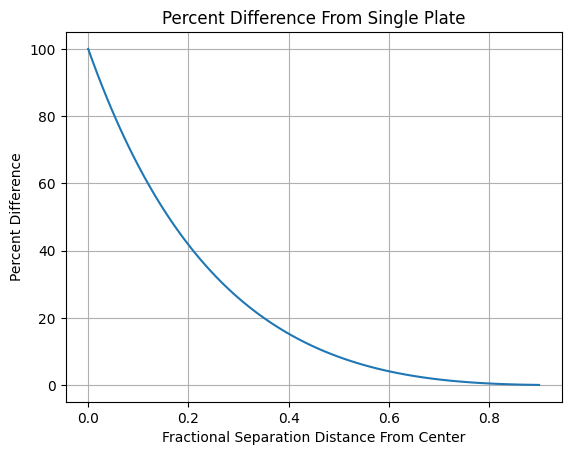

In [26]:
##=============================================================================================##
## Step 5: Setup the Problem                                                                   ##
##=============================================================================================##

plate_separation = 1.0

x_plate_r =  plate_separation / 2.0
x_plate_l = -plate_separation / 2.0

q_real = 1e-9
x_real = 0.1 * (plate_separation / 2.0)

N_images = 100

##=============================================================================================##
## Step 6: Create the Image Charges                                                            ##
##=============================================================================================##

## YOUR CODE HERE

images_df = get_image_charges(q_real, x_real, x_plate_r, x_plate_l, N_images)

display_dataframes([images_df], ["Image Charges"])

##=============================================================================================##
## Step 7: Compute the Total Force on the Real Charge                                          ##
##=============================================================================================##

## YOUR CODE HERE

F_total = image_force(q_real, x_real, images_df)

print()
print(f"F_total = {F_total:.6e} N (+x)")

##=============================================================================================##
## Step 8: Compute the Total Force on the Real Charge From a Single Plate                      ##
##=============================================================================================##

## YOUR CODE HERE

F_single_plate = k * q_real**2 / (x_real - x_plate_r)**2 / 4

print()
print(f"F_single_plate = {F_single_plate:.6e} N (+x)")

##=============================================================================================##
## Step 9: Compute the Percent Error                                                           ##
##=============================================================================================##

## YOUR CODE HERE

percent_error = 100 * (F_single_plate - F_total) / F_single_plate

print()
print(f"Percent Error = {percent_error:.6f} %")

##=============================================================================================##
## Step 10: Investigate How the Percent Error is Affected by Plate Separation                  ##
##=============================================================================================##

x_real_list = np.linspace(0.0, 0.9 * plate_separation / 2.0, 100)

x_real_fraction = 2.0 * x_real_list / plate_separation

F_total_list = []
F_single_plate_list = []
percent_difference_list = []

for x_real in x_real_list:

  ## YOUR CODE HERE

  images_df = get_image_charges(q_real, x_real, x_plate_r, x_plate_l, N_images)

  F_total = image_force(q_real, x_real, images_df)

  F_total_list.append(F_total)

  F_single_plate = k * q_real**2 / (x_real - x_plate_r)**2 / 4

  F_single_plate_list.append(F_single_plate)

  percent_difference = 100 * (F_single_plate - F_total) / F_single_plate

  percent_difference_list.append(percent_difference)

figure = plt.figure()
ax     = figure.add_subplot(111)

ax.plot(x_real_fraction, percent_difference_list)
ax.set_title("Percent Difference From Single Plate")
ax.set_xlabel("Fractional Separation Distance From Center")
ax.set_ylabel("Percent Difference")
ax.grid()

plt.show()